# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

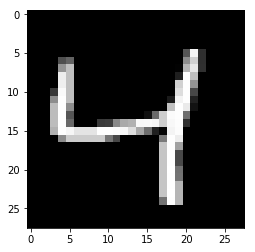

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [18]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, 784))
targets_ = tf.placeholder(tf.float32, shape=(None, 784))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.contrib.layers.fully_connected(encoded, num_outputs=784, activation_fn=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [11]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [19]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6958
Epoch: 1/20... Training loss: 0.6923
Epoch: 1/20... Training loss: 0.6891
Epoch: 1/20... Training loss: 0.6859
Epoch: 1/20... Training loss: 0.6819
Epoch: 1/20... Training loss: 0.6770
Epoch: 1/20... Training loss: 0.6714
Epoch: 1/20... Training loss: 0.6645
Epoch: 1/20... Training loss: 0.6567
Epoch: 1/20... Training loss: 0.6466
Epoch: 1/20... Training loss: 0.6362
Epoch: 1/20... Training loss: 0.6239
Epoch: 1/20... Training loss: 0.6134
Epoch: 1/20... Training loss: 0.5976
Epoch: 1/20... Training loss: 0.5827
Epoch: 1/20... Training loss: 0.5629
Epoch: 1/20... Training loss: 0.5514
Epoch: 1/20... Training loss: 0.5325
Epoch: 1/20... Training loss: 0.5166
Epoch: 1/20... Training loss: 0.4972
Epoch: 1/20... Training loss: 0.4784
Epoch: 1/20... Training loss: 0.4630
Epoch: 1/20... Training loss: 0.4448
Epoch: 1/20... Training loss: 0.4284
Epoch: 1/20... Training loss: 0.4085
Epoch: 1/20... Training loss: 0.4009
Epoch: 1/20... Training loss: 0.3872
E

Epoch: 1/20... Training loss: 0.2007
Epoch: 1/20... Training loss: 0.1959
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.2003
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1861
E

Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1617
Epoch: 2/20... Training loss: 0.1646
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1646
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1448
E

Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1436
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1440
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1411
E

Epoch: 3/20... Training loss: 0.1266
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1296
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1299
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1224
E

Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1197
E

Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1105
E

Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1077
E

Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0985
E

Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1007
E

Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0935
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0980
E

Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0949
E

Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0885
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0891
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0881
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0996
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0989
Epoch: 17/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0987
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0979
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0880
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0953


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

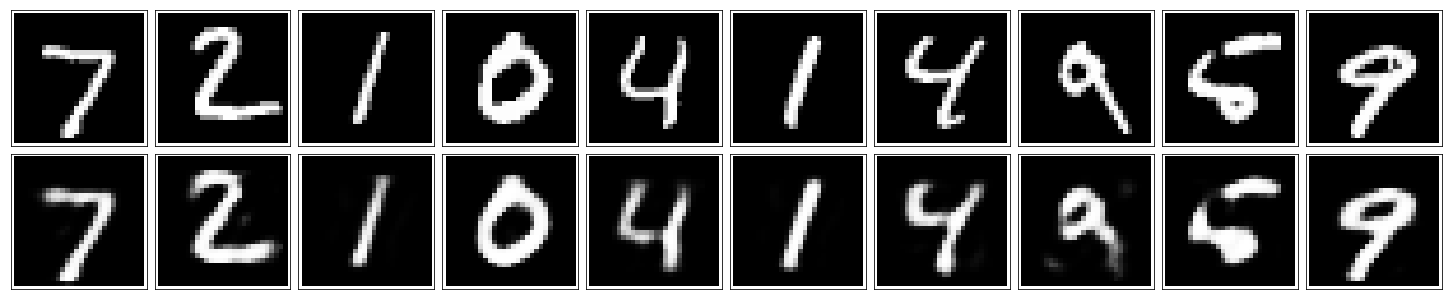

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [21]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.